In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import hvplot.pandas
import requests
import holoviews as hv


In [177]:
#read data
aaa_df = pd.read_csv("./Resources/accident.csv")
column_names = aaa_df.columns
#get a list of all the columns
column_names

Index(['index', 'accident_id', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
       'PERSONS', 'COUNTY', 'county_name', 'CITY', 'city_name', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'NHS', 'FUNC_SYS', 'func_sys_lit', 'ROAD_FNC',
       'road_fnc_lit', 'RD_OWNER', 'rd_owner_lit', 'TWAY_ID', 'TWAY_ID2',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'sp_jur_lit', 'HARM_EV',
       'harm_ev_lit', 'MAN_COLL', 'man_coll_lit', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'lgt_cond_lit',
       'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'cf1_lit',
       'cf2_lit', 'cf3_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DR

In [178]:
#gather the data that i need to create a map of the cities
map_df = aaa_df[["PERSONS","county_name", "city_name", "LATITUDE", "LONGITUD", "FATALS", "TWAY_ID"]]
map_df

,PERSONS,county_name,city_name,LATITUDE,LONGITUD,FATALS,TWAY_ID
0,1,PIMA,NONE LISTED,32.182858,-111.165178,1,CLAUDE ST
1,2,YAVAPAI,CLARKDALE,34.758317,-112.058594,1,SR-89A
2,0,MARICOPA,PHOENIX,33.507908,-112.207581,1,69TH AVE
3,2,MARICOPA,GILBERT,33.350222,-111.738367,1,ELLIOT RD
4,4,PIMA,TUCSON,31.900239,-110.664633,1,SR-83
...,...,...,...,...,...,...,...
1855,1,MARICOPA,NONE LISTED,99.999900,999.999900,1,WOODSIDE DR
1856,2,NAVAJO,NONE LISTED,99.999900,999.999900,2,UNKNOWN RD
1857,1,MARICOPA,PHOENIX,99.999900,999.999900,1,UNION HILLS DR
1858,3,MARICOPA,GLENDALE,33.654364,-112.194922,1,UNION HILLS DR


In [179]:
#graph my data 



maps = map_df.hvplot.points(
    "LONGITUD", 
    "LATITUDE", 
    geo=True,
    tiles="OSM",
    size=5,
    color="red", 
    alpha=0.5, 
    title="TRAFFIC DEATHS In ARIZONA",
    width=700, 
    height=500,
    hover_cols=['city_name', 'FATALS'],
    xlim = (-115, -109),
    ylim= (31,37.5)
)


# Display the map
maps
# Export the plot as an image file


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUD,LATITUDE]   (city_name,FATALS)

In [180]:
#something fun to see what crash had the most fatalities
persons_involved = aaa_df.sort_values(by=["FATALS", "VE_TOTAL"], ascending=False)
persons_involved

,index,accident_id,ST_CASE,VE_TOTAL,VE_FORMS,PEDS,PERSONS,COUNTY,county_name,CITY,...,A_POLPUR,a_polour_lit,A_POSBAC,a_posbac_lit,A_DIST,a_dist_lit,A_DROWSY,a_drowsy_lit,INDIAN_RES,indian_res_lit
1344,1344,2015040551,40551,2,2,0,7,1,APACHE,0,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,1,Tribal Lands
1438,1438,2015040757,40757,2,2,0,5,13,MARICOPA,80,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
58,58,2012040123,40123,1,1,0,6,15,MOHAVE,0,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,1,Involving a Distracted Driver,2,Other Crash,0,Not Tribal Lands
249,249,2012040525,40525,5,5,0,19,1,APACHE,0,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,1,Tribal Lands
941,941,2014040373,40373,3,3,0,7,9,GRAHAM,0,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,1,Tribal Lands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,1850,2016040864,40864,1,1,0,1,13,MARICOPA,370,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,1,Involving a Distracted Driver,2,Other Crash,0,Not Tribal Lands
1854,1854,2016040871,40871,1,1,1,2,13,MARICOPA,370,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1855,1855,2016040872,40872,1,1,0,1,13,MARICOPA,0,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1857,1857,2016040876,40876,1,1,1,1,13,MARICOPA,370,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands


In [181]:
total_accidents = aaa_df["accident_id"].nunique()

In [182]:
#some of the questions I wanted to show. 
print(f"Which areas are the worst in AZ for fatal accidents?")
print(f"County, city, Roads?")
print(f"Highest total # of fatal accidents per capita?")
print(f"Highest total # of fatalities overall?")
print(f"How many people injured/fatalities?")

Which areas are the worst in AZ for fatal accidents?
County, city, Roads?
Highest total # of fatal accidents per capita?
Highest total # of fatalities overall?
How many people injured/fatalities?


In [183]:
#created a dataframe that groups all dta by year and county 


# Group by both year and county_name, then count the occurrences of PERSONS
grouped_df = aaa_df.groupby(['YEAR', 'county_name']).agg({
    "accident_id": "nunique",
    "FATALS": "sum",
    "PERSONS": "sum",
    "VE_TOTAL": "sum",
    "FATALS": "sum",
    "PEDS": "sum",
    
    
    
    


}).reset_index()

grouped_df
#filter out county_name 999
grouped_df = grouped_df[grouped_df["county_name"] != "999"]

grouped_df

,YEAR,county_name,accident_id,FATALS,PERSONS,VE_TOTAL,PEDS
1,2012,APACHE,31,39,103,43,7
2,2012,COCHISE,7,7,9,8,0
3,2012,COCONINO,25,30,51,30,5
4,2012,GILA,11,13,31,15,2
5,2012,GRAHAM,1,1,1,1,1
...,...,...,...,...,...,...,...
72,2016,NAVAJO,17,21,41,22,3
73,2016,PIMA,42,47,92,60,12
74,2016,PINAL,34,38,85,45,8
75,2016,YAVAPAI,16,17,43,26,1


In [184]:
#rename columns
renamed_df = grouped_df.rename(columns={
    "accident_id": "Number of Fatal Accidents",
    "FATALS": "Total Fatalities",
    "PERSONS": "Total Persons Involved",
    "VE_TOTAL": "Total Vehicles Involved",
    "PEDS": "Total Pedestrians Involved",
    "county_name": "County Name",
})
    
renamed_df

,YEAR,County Name,Number of Fatal Accidents,Total Fatalities,Total Persons Involved,Total Vehicles Involved,Total Pedestrians Involved
1,2012,APACHE,31,39,103,43,7
2,2012,COCHISE,7,7,9,8,0
3,2012,COCONINO,25,30,51,30,5
4,2012,GILA,11,13,31,15,2
5,2012,GRAHAM,1,1,1,1,1
...,...,...,...,...,...,...,...
72,2016,NAVAJO,17,21,41,22,3
73,2016,PIMA,42,47,92,60,12
74,2016,PINAL,34,38,85,45,8
75,2016,YAVAPAI,16,17,43,26,1


In [185]:
state_population = [
    6556344,
    6634690,
    6732873,
    6832810,
    6944767
    
]

In [186]:
#year totals
yearly_fatals = renamed_df.groupby("YEAR").sum({
    "Number of Fatal Accidents",
    "Total Fatalities",
    "Total Persons Involved",
    "Total Vehicles Involved",
    "Total Pedestrians Involved"
}).reset_index()
yearly_fatals["Estimated Population"] = state_population
#ADD TOTAL ARIZONA POPULATION TO GET PER CAPITA

yearly_fatals['Fatal Accidents Per 100,000'] = (yearly_fatals['Number of Fatal Accidents'] / yearly_fatals['Estimated Population']) * 100000

yearly_fatals["Fatal Accidents Per 100,000"]=yearly_fatals["Fatal Accidents Per 100,000"].round(1)
yearly_fatals

,YEAR,Number of Fatal Accidents,Total Fatalities,Total Persons Involved,Total Vehicles Involved,Total Pedestrians Involved,Estimated Population,"Fatal Accidents Per 100,000"
0,2012,382,422,896,545,81,6556344,5.8
1,2013,381,415,908,531,96,6634690,5.7
2,2014,346,379,713,452,97,6732873,5.1
3,2015,354,392,794,503,96,6832810,5.2
4,2016,391,425,831,539,105,6944767,5.6


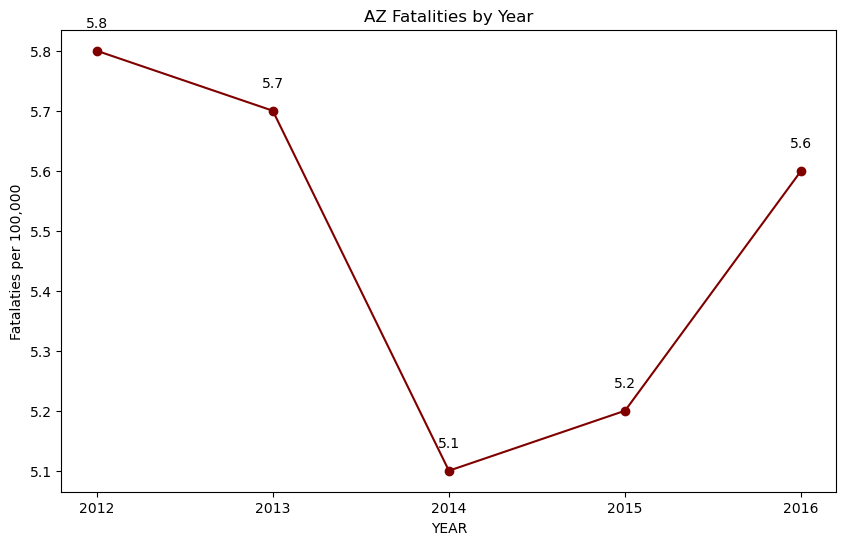

In [187]:
#CREATE GRAPH OF YEARLY FATALATIES
#graph total fatalities
yearly_fatals[["YEAR", "Total Fatalities"]]
plt.figure(figsize=(10,6))
plt.plot(
    yearly_fatals["YEAR"],
    yearly_fatals["Fatal Accidents Per 100,000"],
    marker='o', 
    color = "maroon"
)
for x, y in zip(yearly_fatals["YEAR"], yearly_fatals["Fatal Accidents Per 100,000"]):
    plt.annotate(f'{y}', xy=(x, y), xytext=(0, 20), textcoords='offset points', ha='center', va='center')
plt.xlabel("YEAR")
plt.ylabel("Fatalaties per 100,000")
plt.title("AZ Fatalities by Year")
plt.xticks(yearly_fatals["YEAR"])




plt.savefig("GRAPHS/Yearly AZ Fatalities.png")
plt.show()

In [188]:
counts_df = aaa_df.groupby(["county_name"]).agg({
    "accident_id": "nunique",
    "FATALS": "sum",
    "PERSONS": "sum",
    "VE_TOTAL": "sum",
    "PEDS": "sum",
    "FATALS": "sum"
}).reset_index()
counts_df = counts_df[counts_df["county_name"] != "999"]
counts_df

,county_name,accident_id,FATALS,PERSONS,VE_TOTAL,PEDS
1,APACHE,127,154,317,158,26
2,COCHISE,40,45,88,56,2
3,COCONINO,109,123,231,128,17
4,GILA,62,71,140,79,8
5,GRAHAM,18,23,39,25,5
6,GREENLEE,11,14,23,14,1
7,LA PAZ,25,26,52,31,1
8,MARICOPA,757,801,1666,1116,281
9,MOHAVE,75,82,143,104,11
10,NAVAJO,97,113,249,122,18


In [189]:
#ADD COUNTY POPULATION
county_population =[
    73112,
    125770,
    140908,
    53556,
    37599,
    9613,
    20317,
    4242997,
    205249,
    110026,
    1016206,
    418540,
    45985,
    225562,
    205631]
counts_df["Estimated Population"] = county_population
counts_df

,county_name,accident_id,FATALS,PERSONS,VE_TOTAL,PEDS,Estimated Population
1,APACHE,127,154,317,158,26,73112
2,COCHISE,40,45,88,56,2,125770
3,COCONINO,109,123,231,128,17,140908
4,GILA,62,71,140,79,8,53556
5,GRAHAM,18,23,39,25,5,37599
6,GREENLEE,11,14,23,14,1,9613
7,LA PAZ,25,26,52,31,1,20317
8,MARICOPA,757,801,1666,1116,281,4242997
9,MOHAVE,75,82,143,104,11,205249
10,NAVAJO,97,113,249,122,18,110026


In [190]:
#organize by total fatalities
county_counts_df= counts_df.rename(columns={
    "accident_id": "Number of Fatal Accidents",
    "FATALS": "Total Fatalities",
    "PERSONS": "Total Persons Involved",
    "VE_TOTAL": "Total Vehicles Involved",
    "PEDS": "Total Pedestrians Involved",
    "county_name": "County Name",
    
})
    
total_county_df = county_counts_df.sort_values(by=["Total Fatalities"],ascending=False)
total_county_df

,County Name,Number of Fatal Accidents,Total Fatalities,Total Persons Involved,Total Vehicles Involved,Total Pedestrians Involved,Estimated Population
8,MARICOPA,757,801,1666,1116,281,4242997
11,PIMA,221,234,474,307,51,1016206
12,PINAL,153,170,401,218,31,418540
1,APACHE,127,154,317,158,26,73112
3,COCONINO,109,123,231,128,17,140908
10,NAVAJO,97,113,249,122,18,110026
14,YAVAPAI,87,95,174,114,10,225562
9,MOHAVE,75,82,143,104,11,205249
4,GILA,62,71,140,79,8,53556
15,YUMA,59,66,118,81,11,205631


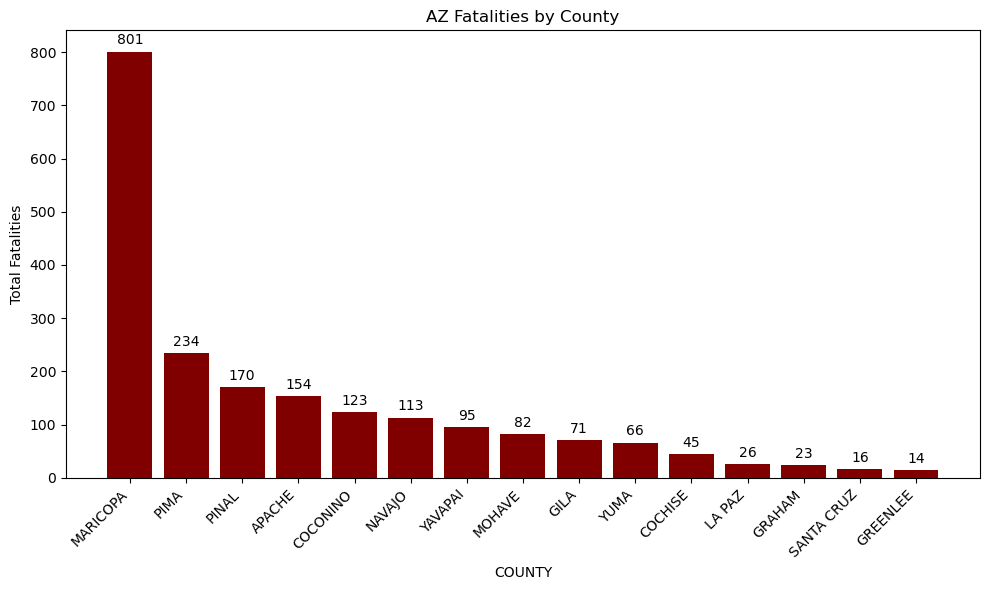

In [191]:
#graph total fatalities
total_county_df[["County Name", "Total Fatalities"]]
plt.figure(figsize=(10,6))
bars = plt.bar(
    total_county_df["County Name"],
    total_county_df["Total Fatalities"],
    color = "maroon")
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel("COUNTY")
plt.ylabel("Total Fatalities")
plt.title("AZ Fatalities by County")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("GRAPHS/County Car Fatalities.png")
plt.show()

In [192]:
#calculate per capita fatalities by county
county_counts_df['Fatality Rate Per 100,000'] = (county_counts_df['Total Fatalities'] / county_counts_df['Estimated Population']) * 100000
county_counts_df['Fatal Accidents Per 100,000'] = (county_counts_df['Number of Fatal Accidents'] / county_counts_df['Estimated Population']) * 100000
county_fatality_rate_df = county_counts_df.sort_values(by=["Fatality Rate Per 100,000"], ascending=False)
#round to whole numbers
county_fatality_rate_df["Fatality Rate Per 100,000"]=county_fatality_rate_df["Fatality Rate Per 100,000"].round(1)
county_fatality_rate_df["Fatal Accidents Per 100,000"]=county_fatality_rate_df["Fatal Accidents Per 100,000"].round(1)
county_fatality_rate_df

,County Name,Number of Fatal Accidents,Total Fatalities,Total Persons Involved,Total Vehicles Involved,Total Pedestrians Involved,Estimated Population,"Fatality Rate Per 100,000","Fatal Accidents Per 100,000"
1,APACHE,127,154,317,158,26,73112,210.6,173.7
6,GREENLEE,11,14,23,14,1,9613,145.6,114.4
4,GILA,62,71,140,79,8,53556,132.6,115.8
7,LA PAZ,25,26,52,31,1,20317,128.0,123.0
10,NAVAJO,97,113,249,122,18,110026,102.7,88.2
3,COCONINO,109,123,231,128,17,140908,87.3,77.4
5,GRAHAM,18,23,39,25,5,37599,61.2,47.9
14,YAVAPAI,87,95,174,114,10,225562,42.1,38.6
12,PINAL,153,170,401,218,31,418540,40.6,36.6
9,MOHAVE,75,82,143,104,11,205249,40.0,36.5


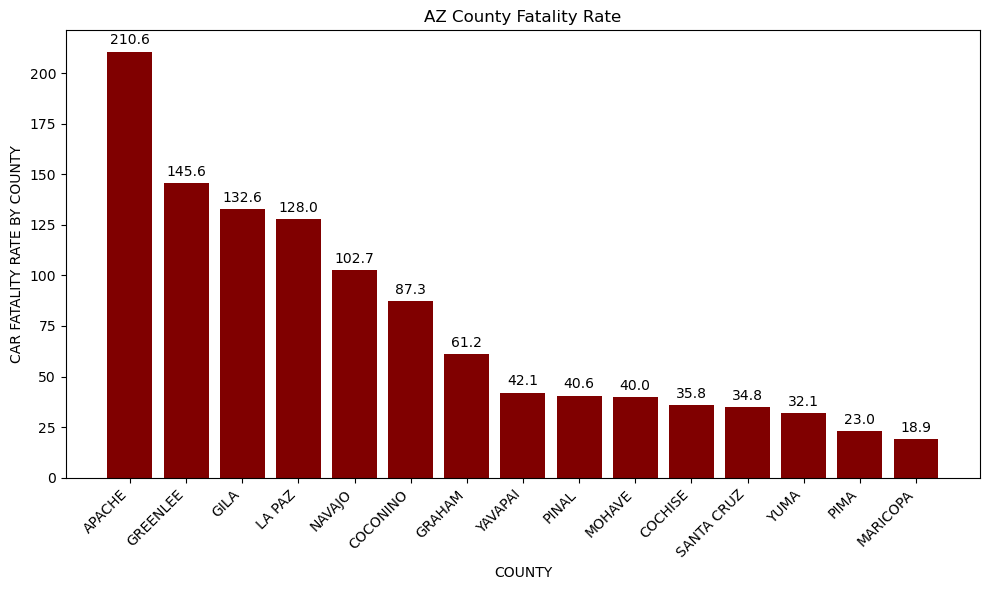

In [193]:
#CREATE GRAPH TO REPRESENT COUNTY CRASHES per Capita

county_fatality_rate_df[["County Name", "Fatality Rate Per 100,000"]]
plt.figure(figsize=(10,6))
bars = plt.bar(
    county_fatality_rate_df["County Name"],
    county_fatality_rate_df["Fatality Rate Per 100,000"],
    color = "maroon")
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel("COUNTY")
plt.ylabel("CAR FATALITY RATE BY COUNTY")
plt.title("AZ County Fatality Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("GRAPHS/County Car Fatality Rate.png")
plt.show()

In [194]:
#create a dataframe for cities
city_df = aaa_df.groupby(['city_name']).agg({
     "accident_id": "nunique",
    "FATALS": "sum",
    "PERSONS": "sum",
    "VE_TOTAL": "sum",
    "FATALS": "sum",
    "PEDS": "sum",
}).reset_index()
city_df

,city_name,accident_id,FATALS,PERSONS,VE_TOTAL,PEDS
0,AMADO,1,1,2,1,0
1,APACHE JUNCTION,13,13,31,19,4
2,AVONDALE,13,13,36,18,3
3,BOUSE,1,1,1,1,0
4,BUCKEYE,8,8,13,10,4
...,...,...,...,...,...,...
86,WHITE MOUNTAIN LAKE,1,2,7,2,0
87,WHITERIVER,6,7,14,6,3
88,WILLCOX,1,1,2,1,0
89,WINSLOW,1,1,2,1,1


In [195]:
#organize data by city
city_counts_df= city_df.rename(columns={
    "accident_id": "Total_Fatal_Accidents",
    "FATALS": "Total_Fatalities",
    "PERSONS": "Total_Persons_Involved",
    "VE_TOTAL": "Total_Vehicles_Involved",
    "PEDS": "Total_Pedestrians_Involved",
    "city_name": "City_Name",
})
    
city_counts_df = city_counts_df.sort_values(by=["Total_Fatal_Accidents"], ascending=False).reset_index()
#needed to filter out crashes that were not associated with a city
city_counts_df = city_counts_df[city_counts_df["City_Name"] != "NONE LISTED"]
del city_counts_df["index"]
city_counts_df.head(15)


,City_Name,Total_Fatal_Accidents,Total_Fatalities,Total_Persons_Involved,Total_Vehicles_Involved,Total_Pedestrians_Involved
1,PHOENIX,336,352,711,499,171
2,TUCSON,92,97,199,135,26
3,GLENDALE,57,60,114,76,31
4,MESA,52,58,119,84,17
5,PEORIA,31,34,95,48,5
6,YUMA,30,33,46,36,11
7,CHANDLER,25,29,67,37,8
8,SCOTTSDALE,24,27,66,36,8
9,GILBERT,23,26,42,34,4
10,SURPRISE,16,16,48,29,1


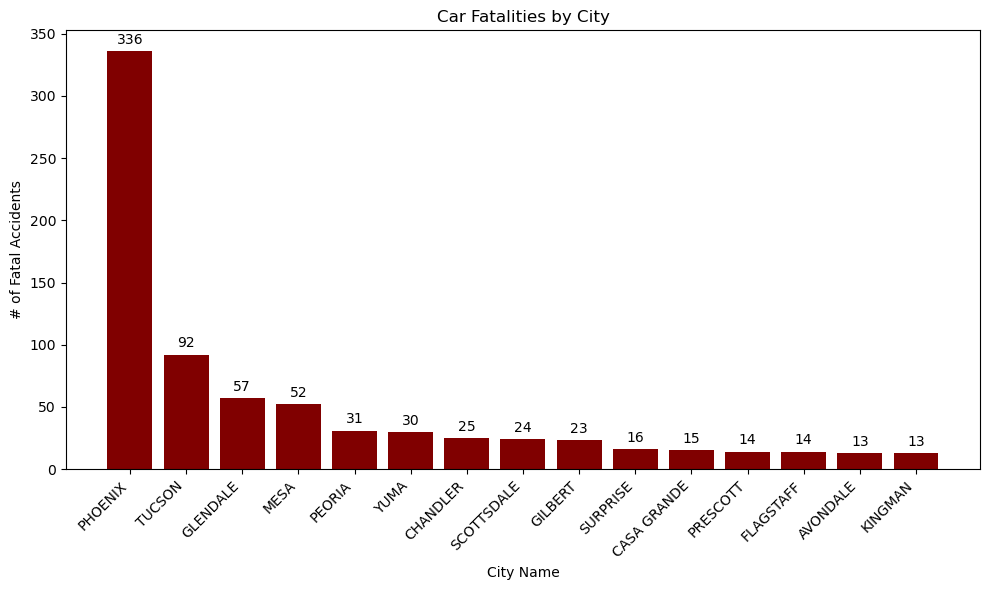

In [196]:
#create graph for top 15 cities
city15 = city_counts_df.head(15)
city15 = city15[["City_Name", "Total_Fatal_Accidents"]]
plt.figure(figsize=(10,6))
bars = plt.bar(
    city15["City_Name"],
    city15["Total_Fatal_Accidents"],
    color = "maroon")
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel("City Name")
plt.ylabel("# of Fatal Accidents")
plt.title("Car Fatalities by City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("GRAPHS/Car Fatalities by City.png")
plt.show()

In [197]:
#create data frame to find most dangerous cities 
street_df = aaa_df.groupby(["TWAY_ID"]).agg({
     "accident_id": "nunique",
    "FATALS": "sum",
    "PERSONS": "sum",
    "VE_TOTAL": "sum",
    "PEDS": "sum",
    "FATALS": "sum"}).reset_index()

street_df = street_df.rename(columns={
    "accident_id": "Total Fatal Accidents",
    "FATALS": "Total Fatalities",
    "PERSONS": "Total Persons Involved",
    "VE_TOTAL": "Total Vehicles Involved",
    "PEDS": "Total Pedestrians Involved",
    "TWAY_ID": "ROAD NAME",
    })


#I just want to see the top 15 streets
dangerous_street_df = street_df.sort_values(by=["Total Fatal Accidents"], ascending=False).reset_index()

dangerous_street_df = dangerous_street_df[dangerous_street_df["ROAD NAME"] != "UNKNOWN RD"]
dangerous_street_df.head(15)

,index,ROAD NAME,Total Fatal Accidents,Total Fatalities,Total Persons Involved,Total Vehicles Involved,Total Pedestrians Involved
0,831,US-191,48,57,110,61,13
2,777,SR-87,33,39,94,49,2
3,568,MCDOWELL RD,33,34,75,47,19
4,747,SR-264,29,42,93,44,3
5,609,NORTHERN AVE,28,28,62,44,18
6,42,43RD AVE,28,29,65,43,19
7,832,US-60,27,28,57,38,1
8,24,27TH AVE,24,24,44,32,18
9,734,SOUTHERN AVE,20,23,49,32,7
10,124,BETHANY HOME RD,20,21,46,31,13


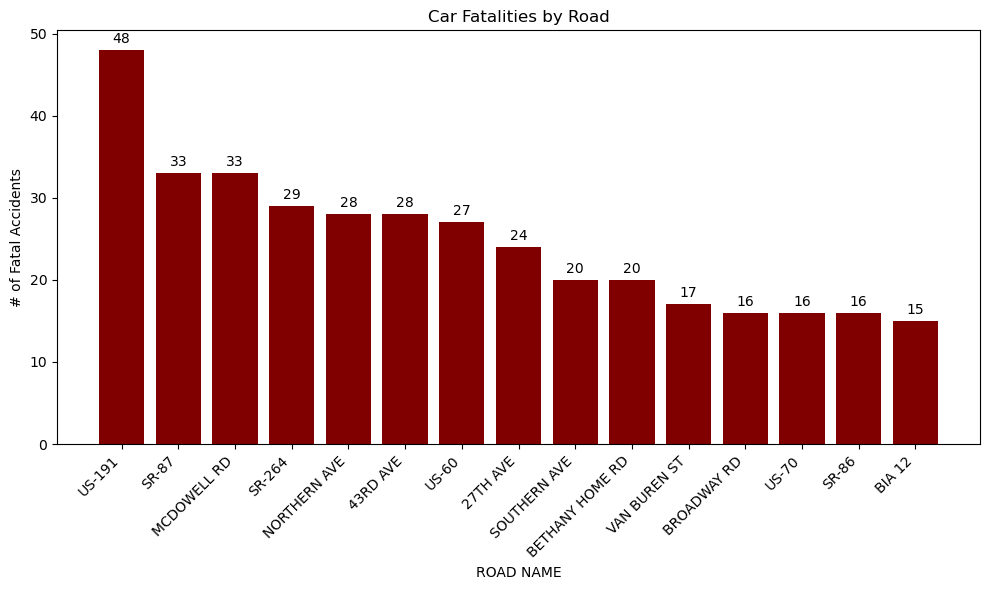

In [198]:
#CREATE GRAPH OF !% MOST DANGEROUS ROADS
top15 = dangerous_street_df.head(15)
top15 = top15[["ROAD NAME", "Total Fatal Accidents"]]
plt.figure(figsize=(10,6))
bars = plt.bar(
    top15["ROAD NAME"],
    top15["Total Fatal Accidents"],
    color = "maroon")
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel("ROAD NAME")
plt.ylabel("# of Fatal Accidents")
plt.title("Car Fatalities by Road")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("GRAPHS/Car Fatalities by Road.png")
plt.show()